 https://github.com/snehaamenon/GRIPTasks/blob/main/EDA%20on%20Global%20Terrorism%20(1).ipynb

# GRIP 2021 | The Sparks Foundation

## DATA SCIENCE & BUSINESS ANALYTICS TASKS

## _AUTHOR : MAHASHRUTHI KB_

# TASK 4 - Exploratory Data Analysis (_TERRORISM_)

### OBJECTIVE
     1. As a security/defense analyst, try to find out the hot zone of terrorism.
     2. What all security issues and insights you can derive by EDA?

In [93]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from simple_colors import *
from wordcloud import WordCloud
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from scipy import signal
import folium
from folium.plugins import MarkerCluster

In [23]:
#read and display the data
df = pd.read_csv(r'C:\Users\MahaShruthi\Downloads\globalterrorism.csv', encoding='ISO-8859-1')
df.head()

C:\Users\MahaShruthi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#display the columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
#checking for the null values in each column
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
#copying and displaying the dataset into a new dataframe
dfcopy = df.copy()
dfcopy.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
#drop the columns with null values
dfcopy.dropna(axis = 1, how = 'all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [8]:
#changing the column names
dfcopy.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [9]:
#considering only the useful columns
dfcopy=dfcopy[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

#filling the null value with zero
dfcopy['Wounded'] = dfcopy['Wounded'].fillna(0).astype(int)
dfcopy['Killed'] = dfcopy['Killed'].fillna(0).astype(int)     

In [10]:
dfcopy.shape

(181691, 18)

In [11]:
dfcopy.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [12]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       181691 non-null  int32  
 11  Wounded      181691 non-null  int32  
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(2), int32(2),

We need to check the presence of null variables for which we'll calculate their percentage before handling them.

In [13]:
count = 0
for i in dfcopy['Day']:
    if (i==0):
      count+=1
    else:
      count=count
print("Number of days entered as 0: ",count)

count1=0
for j in dfcopy['Month']:
    if (j==0):
      count1+=1
    else:
      count1=count1
print("Number of months enterd as 0: ",count1)

Number of days entered as 0:  891
Number of months enterd as 0:  20


We are assigning random dates and months who have their values as 0, so that we don't loose the information of other columns associated with that row.

In [14]:
dfcopy['Day']=dfcopy['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
dfcopy['Month']=dfcopy['Month'].apply(lambda x: np.random.randint(1,13) if x == 9 else x)

In [15]:
#Checking for days
count = 0
for i in dfcopy['Day']:
    if (i == 0):
      count+=1
    else:
      count=count
print("Number of days entered as 0: ",count)

#Count for months
count1=0
for j in dfcopy['Month']:
    if (j==0):
      count1+=1
    else:
      count1=count1
print("Number of months enterd as 0: ",count1)

Number of days entered as 0:  0
Number of months enterd as 0:  20


In [16]:
#missing value percentage
def null_val_(dfcopy): 
    null_val = dfcopy.isnull().sum()
    null_val_p = 100 * dfcopy.isnull().sum()/len(dfcopy)
    null_val_ = pd.concat([null_val, null_val_p], axis=1)
    null_val_last = null_val_.rename(
    columns = {0 : 'Null Values', 1 : 'Percentage '})
    return null_val_last
null_val_(dfcopy)

,Null Values,Percentage
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Country,0,0.000000
state,421,0.231712
Region,0,0.000000
city,434,0.238867
latitude,4556,2.507554
longitude,4557,2.508104
AttackType,0,0.000000


In [17]:
#columns with 'object' data type replaced with NA
#columns having 'float' data type with their respective mean
dfcopy['Motive'].fillna(value='NA', inplace=True) 
dfcopy['Summary'].fillna(value='NA', inplace=True)
dfcopy['Target'].fillna(value='NA', inplace=True)
dfcopy["longitude"].fillna(dfcopy["longitude"].mean(), inplace=True)
dfcopy["latitude"].fillna(dfcopy["latitude"].mean(), inplace=True)
dfcopy['city'].fillna(value='NA', inplace=True)
dfcopy['state'].fillna(value='NA', inplace=True)

In [18]:
dfcopy.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

Null values are handled.

In [19]:
print("The country with highest terror attack: \033[1m"+red(dfcopy['Country'].value_counts().index[0])+"\033[0m")
print("Regions with highest terrorist attacks: \033[1m"+green(dfcopy['Region'].value_counts().index[0])+"\033[0m")
print("Highest people killed in an attack \033[1m",blue(dfcopy['Killed'].max()),"\033[0m","that took place in \033[1m"+red(dfcopy.loc[dfcopy['Killed'].idxmax()].Country)+"\033[0m")
print("City with the highest number of attacks: \033[1m"+red(dfcopy['city'].value_counts().index[1])+"\033[0m")
print("Year with the most attacks: \033[1m",blue(dfcopy['Year'].value_counts().idxmax()),"\033[0m")
print("Month with the most attacks: \033[1m"+cyan(dfcopy['Month'].value_counts().idxmax())+"\033[0m")
print("Group with the most attacks: \033[1m"+magenta(dfcopy['Group'].value_counts().index[1])+"\033[0m")
print("Most Attack Types: \033[1m"+cyan(dfcopy['AttackType'].value_counts().idxmax())+"\033[0m")

The country with highest terror attack: Iraq
Regions with highest terrorist attacks: Middle East & North Africa
Highest people killed in an attack  1570  that took place in Iraq
City with the highest number of attacks: Baghdad
Year with the most attacks:  2014 
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


### PLOTS

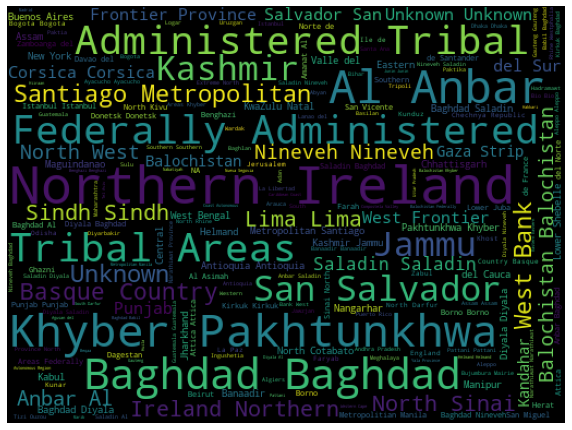

In [20]:
cities=dfcopy.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color='black',width=512,height=382).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In the above wordcloud we can see that the northen ireland,baghdad,tribal areas, khyber and pakhtunkhwa are the most affected cities by terrorism

<AxesSubplot:>

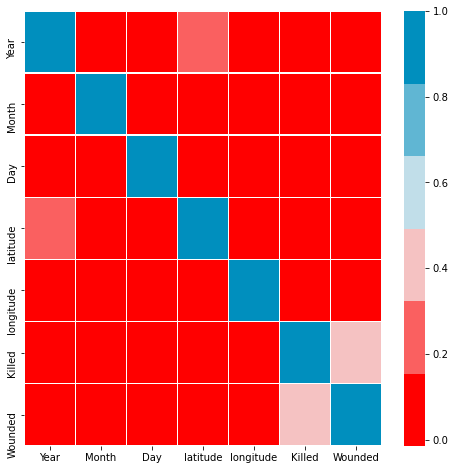

In [29]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(dfcopy.corr(), annot=False, linewidths=.4, fmt =".1f=",cmap=sns.diverging_palette(20,220,200), ax=ax)

C:\Users\MahaShruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


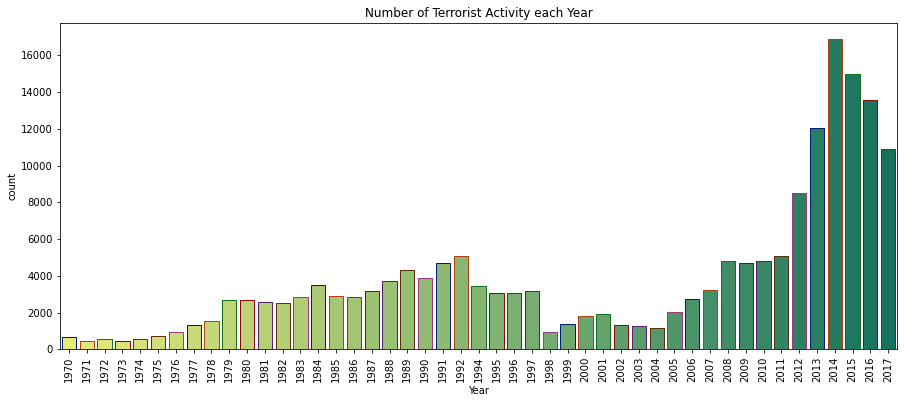

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=dfcopy,palette="summer_r",edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activity each Year")
plt.show()

C:\Users\MahaShruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


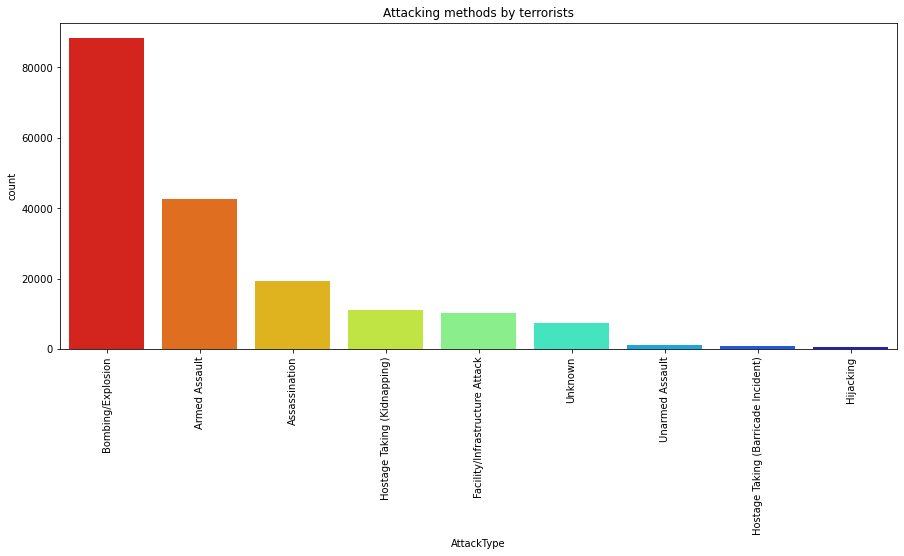

In [37]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=dfcopy,palette='jet_r',order=dfcopy['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Attacking methods by terrorists")
plt.show()


Bombing/Explosion is the most used attacking method by terrorists

C:\Users\MahaShruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


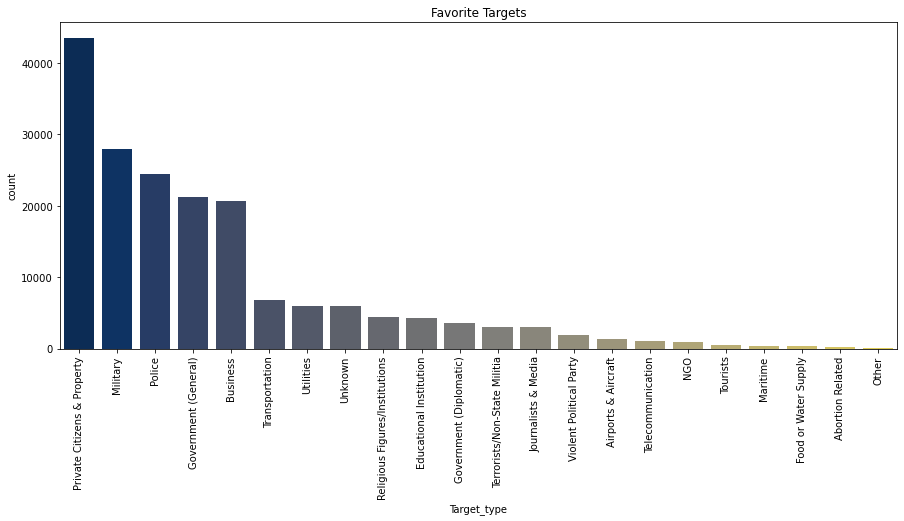

In [41]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=dfcopy,palette='cividis',order=dfcopy['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Favorite Targets")
plt.show()

Private citizens and property are most targeted

C:\Users\MahaShruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


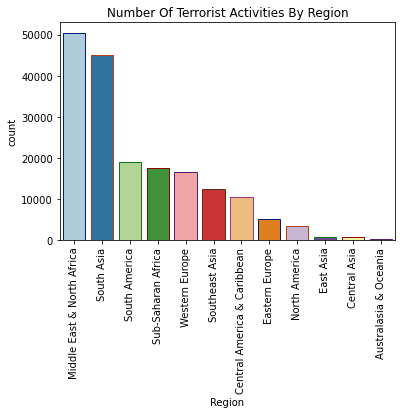

In [42]:
sns.countplot('Region',data=dfcopy,palette='Paired',edgecolor=sns.color_palette('dark',7),order=dfcopy['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Middle East and North Africa is the most affected region by terrorim

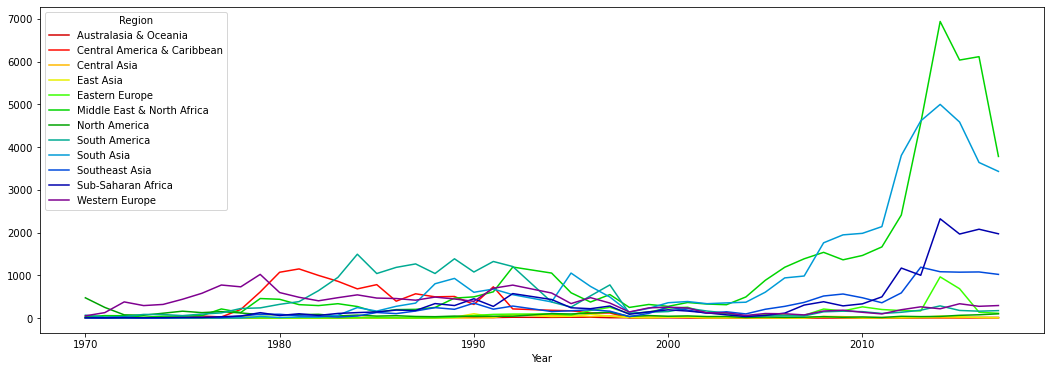

In [46]:
terror_region=pd.crosstab(dfcopy.Year,dfcopy.Region)
terror_region.plot(color=sns.color_palette('nipy_spectral_r',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

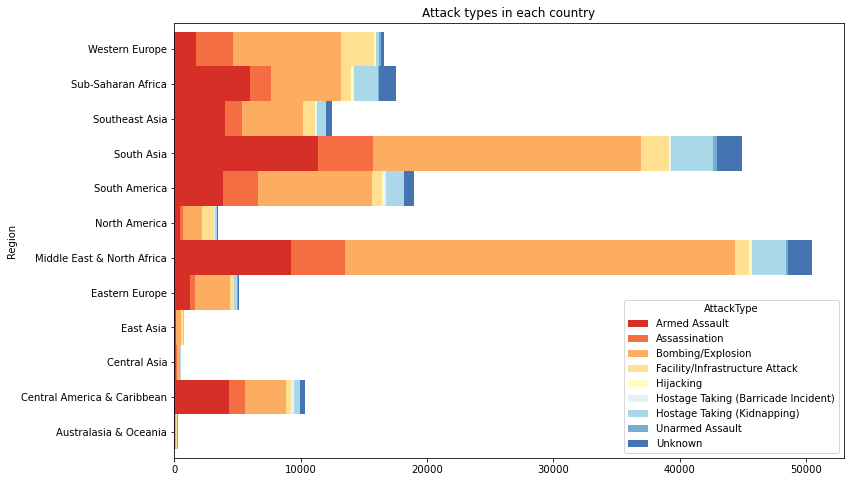

In [52]:
pd.crosstab(dfcopy.Region,dfcopy.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlBu',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title("Attack types in each country")
plt.show()

C:\Users\MahaShruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


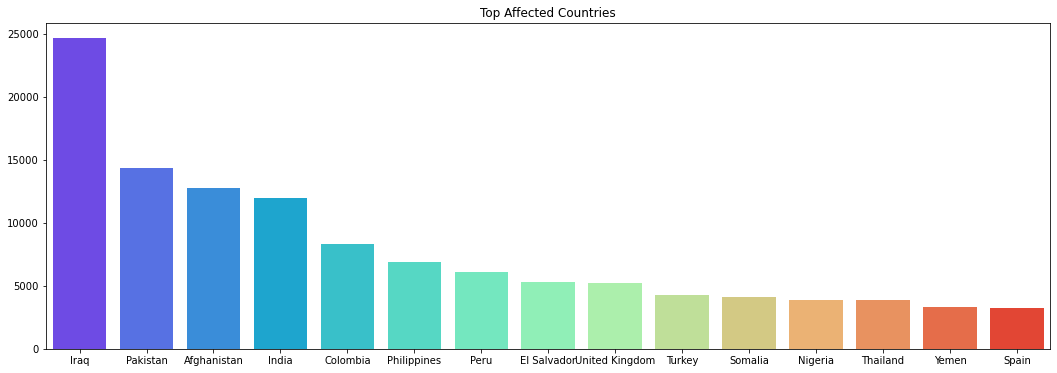

In [53]:
plt.subplots(figsize=(18,6))
sns.barplot(dfcopy['Country'].value_counts()[:15].index,dfcopy['Country'].value_counts()[:15].values,palette='rainbow')
plt.title('Top Affected Countries')
plt.show()

Iraq is the most affected country by terrorism

Text(0.5, 1.0, 'Line Plot - number of attacks and how much people are wounded and killed')

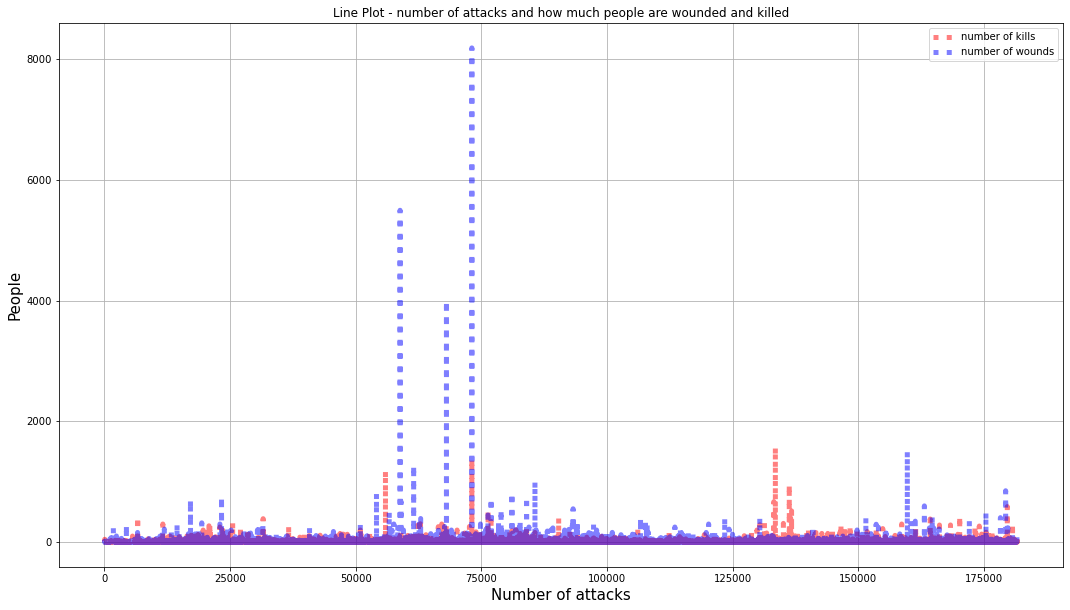

In [56]:
f,ax = plt.subplots(figsize=(18,10))
dfcopy.Killed.plot(kind="line",color = "r", label="number of kills",linewidth=5, alpha=0.5, grid=True, linestyle=":")
dfcopy.Wounded.plot(color="b", label="number of wounds",linewidth=5, alpha=0.5, grid=True,linestyle=":")
plt.legend(loc="upper right")
plt.xlabel("Number of attacks", size=15)
plt.ylabel("People", size=15)
plt.title("Line Plot - number of attacks and how much people are wounded and killed")


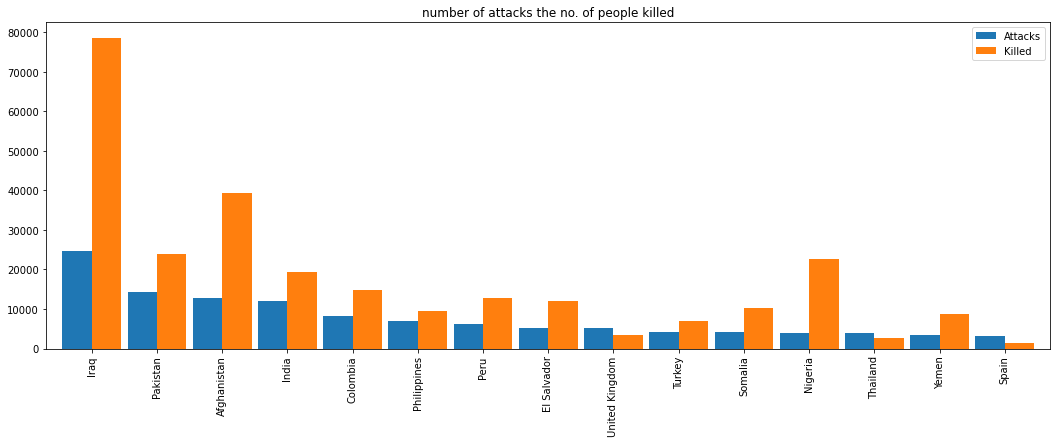

In [58]:
coun_terror=dfcopy['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=dfcopy.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('number of attacks the no. of people killed')
plt.show()

Maximum attacks and killings took place in iraq

Text(0.5, 1.0, 'Year vs Kill Scatter Plot')

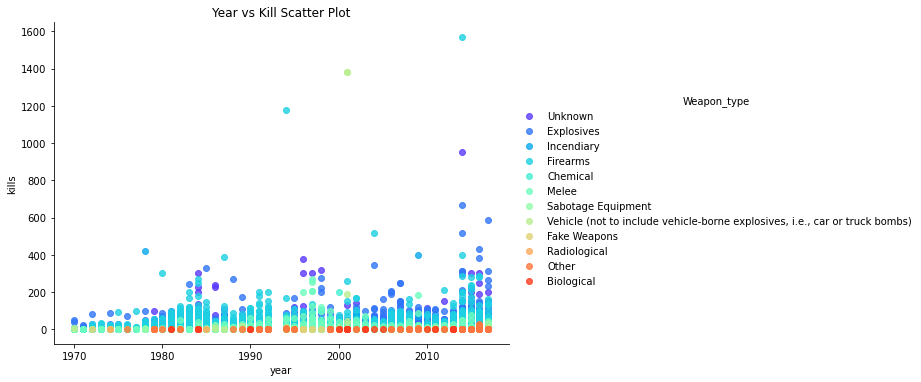

In [64]:
sns.lmplot(x='Year', y='Killed',data=dfcopy,fit_reg=False,hue='Weapon_type',legend=True ,                    
           palette="rainbow",aspect=15/10)
plt.xlabel("year")
plt.ylabel("kills") 
plt.title("Year vs Kill Scatter Plot")

C:\Users\MahaShruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


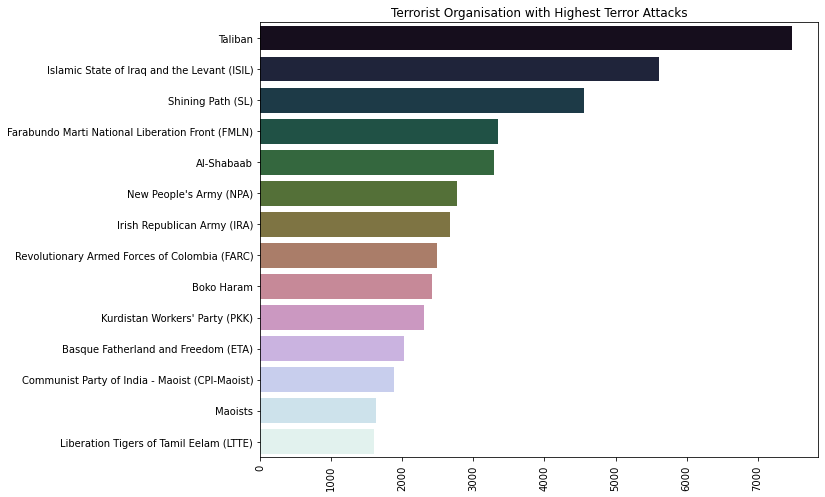

In [66]:
sns.barplot(dfcopy['Group'].value_counts()[1:15].values,dfcopy['Group'].value_counts()[1:15].index,palette=('cubehelix'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Organisation with Highest Terror Attacks')
plt.show()

Highest terror attacks are caused by Taliban terrorist organisation

In [99]:
dfcopy = dfcopy[dfcopy.Group == 'Taliban']

C:\Users\MahaShruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



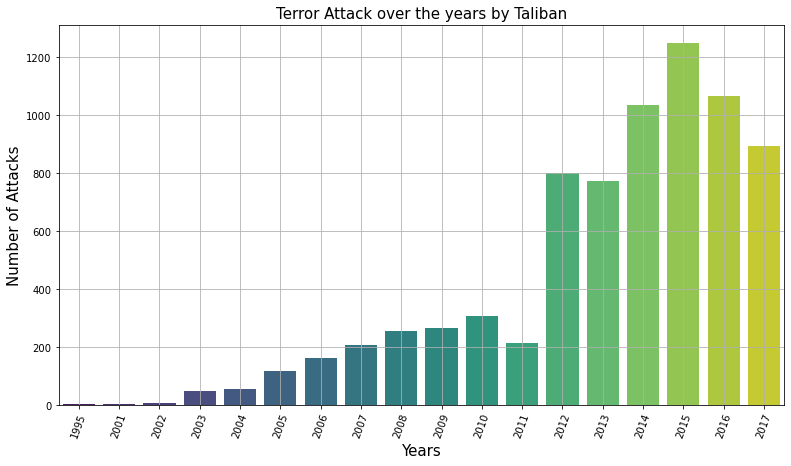

In [100]:
plt.figure(figsize = (13,7))
sns.barplot(dfcopy['Year'].value_counts().index,dfcopy['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 70)
plt.grid()
plt.show()

Sudden increase in attacks by Taliban can be seen from 2012 and it has peaked during 2015.

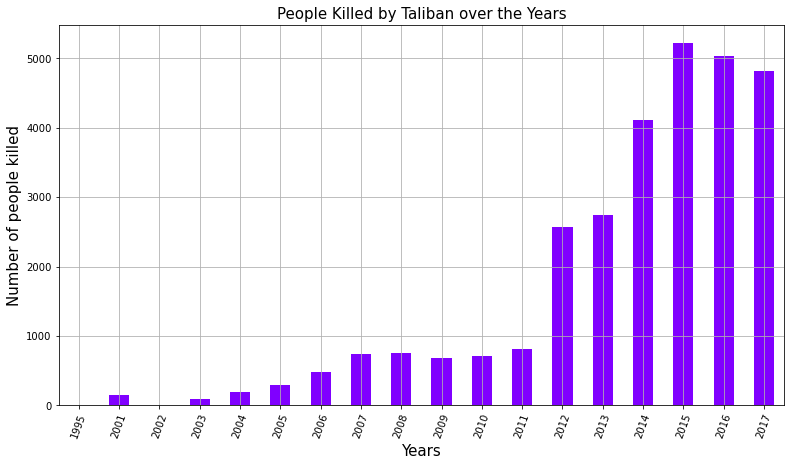

In [102]:
plt.figure(figsize=(13,7))
dfcopy.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='rainbow')
plt.title('People Killed by Taliban over the Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of people killed',fontsize=15)
plt.xticks(rotation=70)
plt.grid()
plt.show()

Taliban killed more than 5000 people during 2015 after that a decreasing trend could be seen but still the numbers are very high.

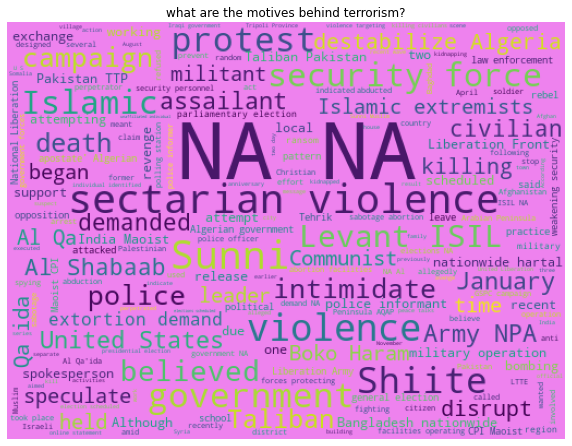

In [98]:
from wordcloud import STOPWORDS
text = " ".join(str(motive) for motive in dfcopy.Motive)
stopwords = set(STOPWORDS)
stopwords.update(["say","NaN","specific" ,"carried","incident","responsibility","claimed","noted","minority", "nothing",
                  "party","Party","noted","attack","motive","source","sources","stated","part","new", "us","The", "specific", "motive", "for",
                  "attack", "is", "unknown", "which", "Unknown","occurred", "occured","Occured", "state", "reported", "member", "group", "area", "related", "intended",
                  "larger","trend","may","target","targeted","suspected","speculated","retaliation","retalisation",
                  "says","call","unknown","nan","NAN","majority","communities","victim", "killed" ,"people", "posited",
                  "victims","attacks","response","United States","accused","iraq","note","stating",
                 "authorities","order","members"])
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(stopwords=stopwords,background_color='violet',width=512,height=382).generate(text)
plt.axis('off')
plt.title("what are the motives behind terrorism?")
plt.imshow(wordcloud)
plt.show()

Above wordcloud you can see what are the motives behind terrorism